# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [2]:
# Data handling
import numpy as np
import pandas as pd

# Macrhine learning
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns



# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [3]:
# Load data
# url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv('bank_transactions_data_edited.csv')


In [4]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [5]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

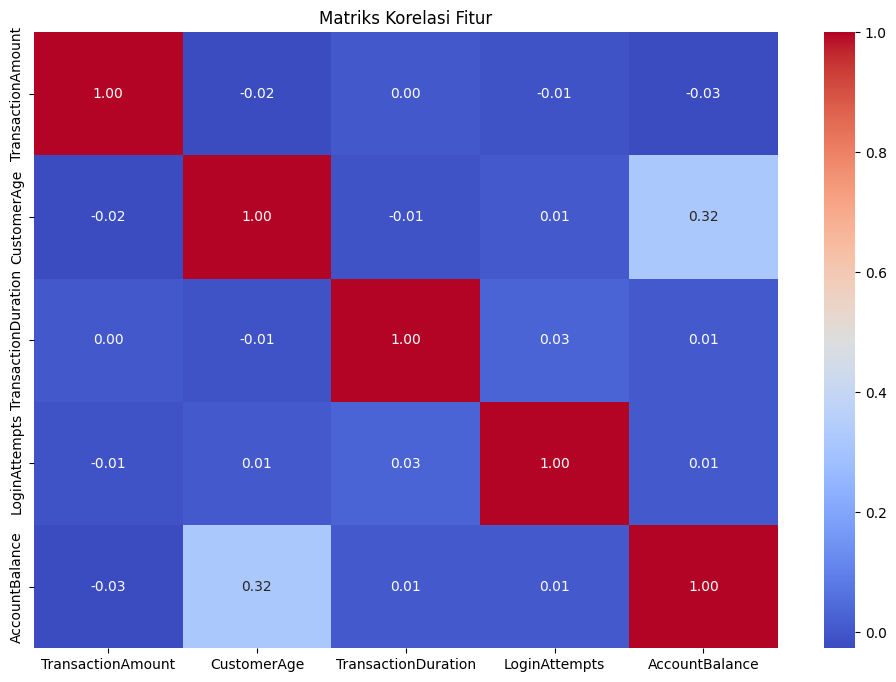

In [7]:
# matriks korelasi fitur numerik (sebelum data preprocessing pada non-numerik)
numeric_df = df.select_dtypes(include=[np.number])
korelasi = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(korelasi, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi Fitur')
plt.show()

Dari Matriks Korelasi di atas korelasi antar fitur terbesar ada pada CustomerAge dengan AccountBalance yang berarti semakin besar CustomerAge maka semakin besar juga Account Balance 

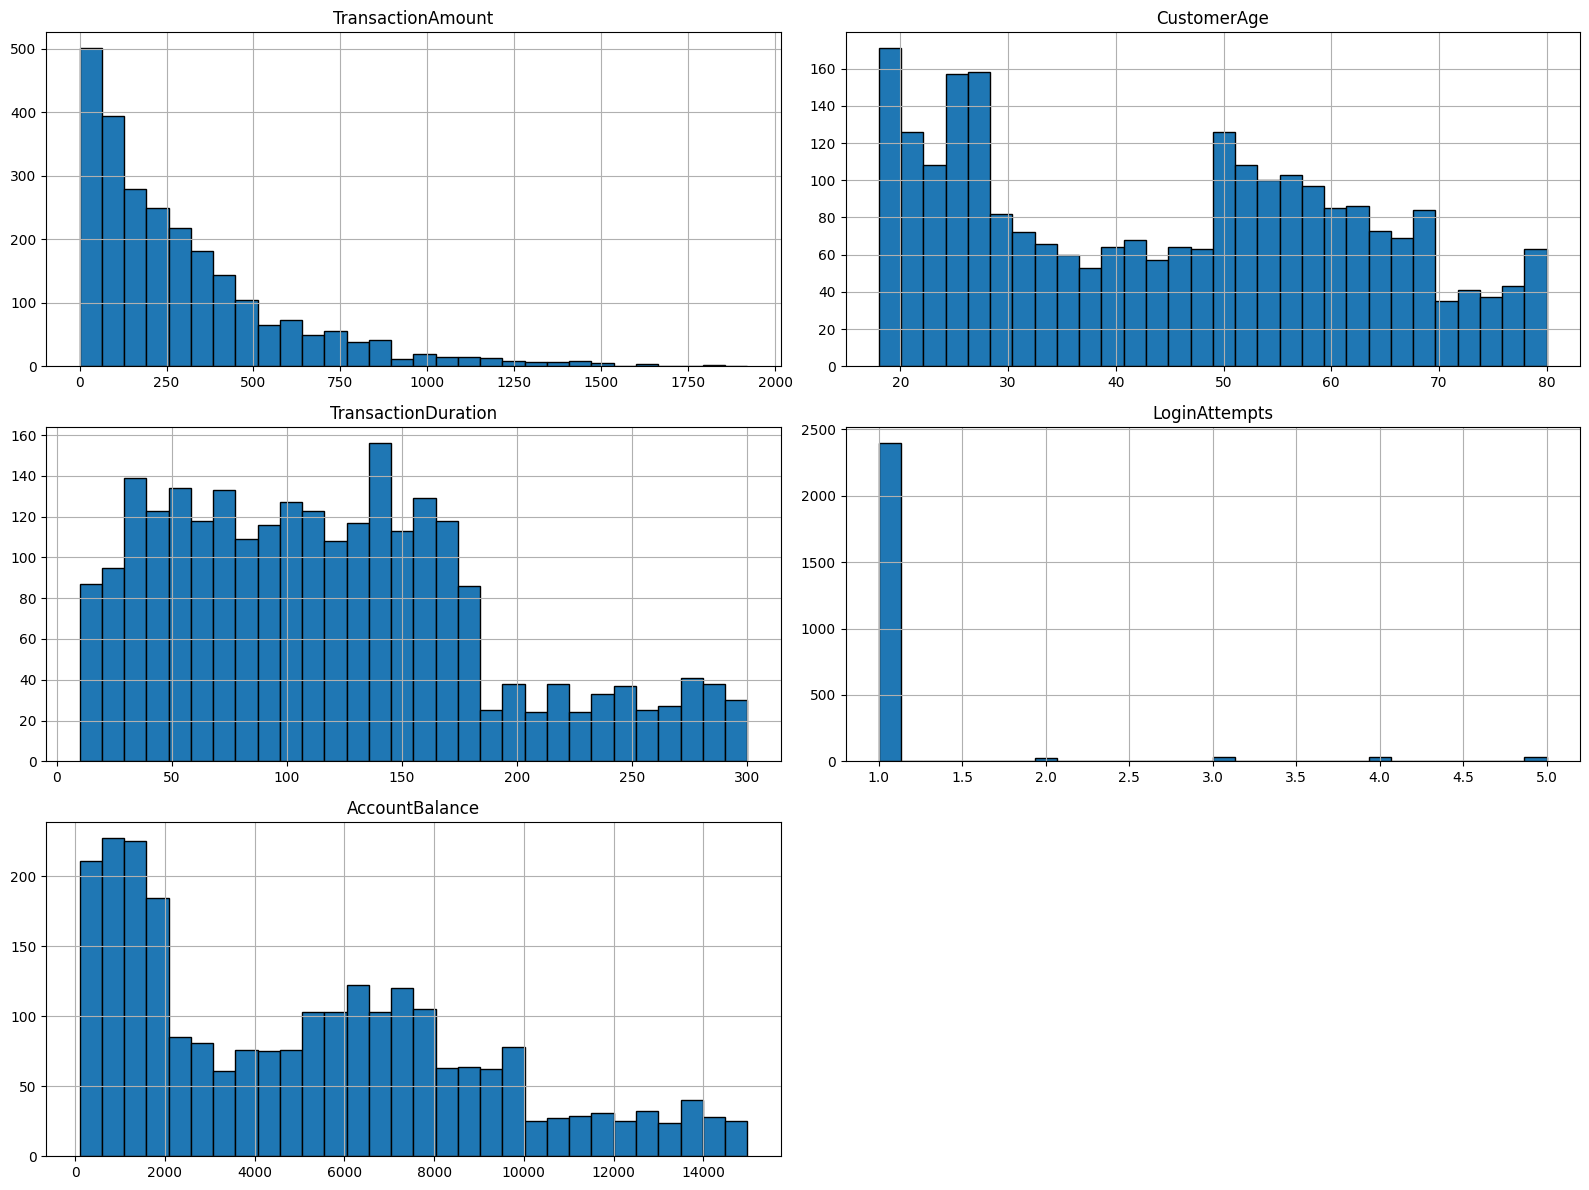

In [8]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [9]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Convert datetime columns
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

print("\nStatistical summary:\n", df.describe(include='all'))




Statistical summary:
        TransactionID AccountID  TransactionAmount  \
count           2508      2516        2511.000000   
unique          2484       495                NaN   
top         TX001748   AC00362                NaN   
freq               2        12                NaN   
mean             NaN       NaN         297.656468   
min              NaN       NaN           0.260000   
25%              NaN       NaN          81.310000   
50%              NaN       NaN         211.360000   
75%              NaN       NaN         413.105000   
max              NaN       NaN        1919.110000   
std              NaN       NaN         292.230367   

                      TransactionDate TransactionType    Location DeviceID  \
count                            2509            2507        2507     2507   
unique                            NaN               2          43      681   
top                               NaN           Debit  Fort Worth  D000573   
freq                        

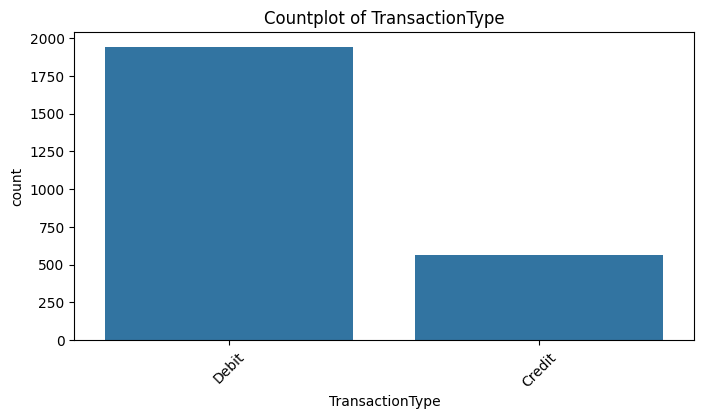

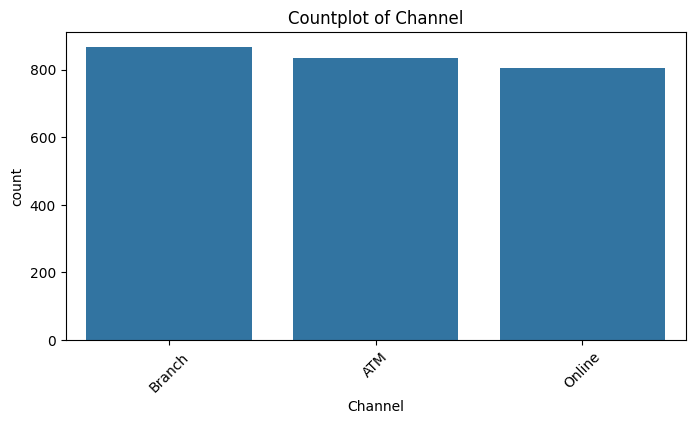

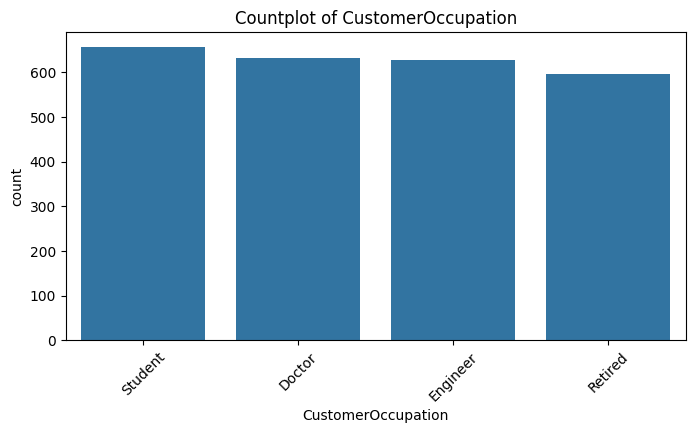

In [11]:

categorical_cols = df.select_dtypes(include=['object']).columns

# Histogram yang menampilkan jumlah antar jenis-jenis pada suatu kolom kategori 

for col in categorical_cols:
    if df[col].nunique() < 20:  
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()



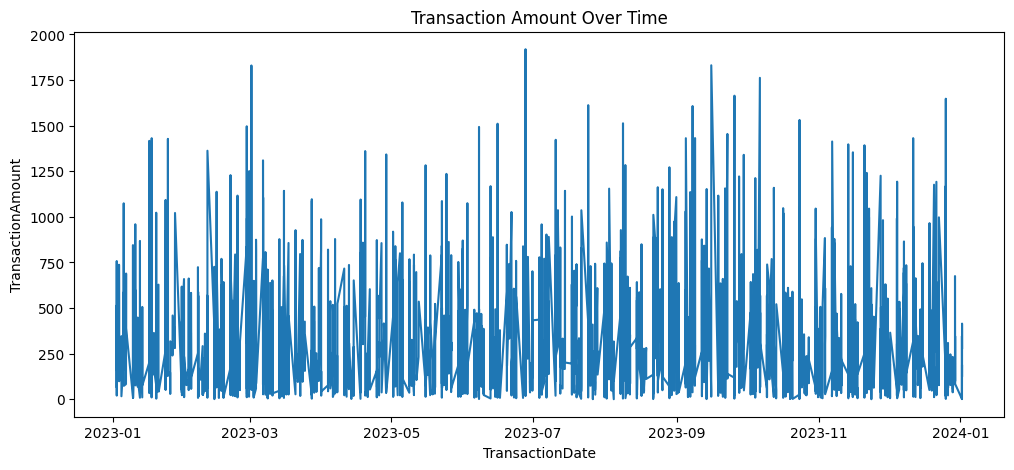

In [12]:
if not df['TransactionDate'].isnull().all():
    plt.figure(figsize=(12, 5))
    sns.lineplot(x="TransactionDate", y="TransactionAmount", data=df)
    plt.title("Transaction Amount Over Time")
    plt.show()

    #grafik hubungan jumlah transaksi dengan waktu transaksi


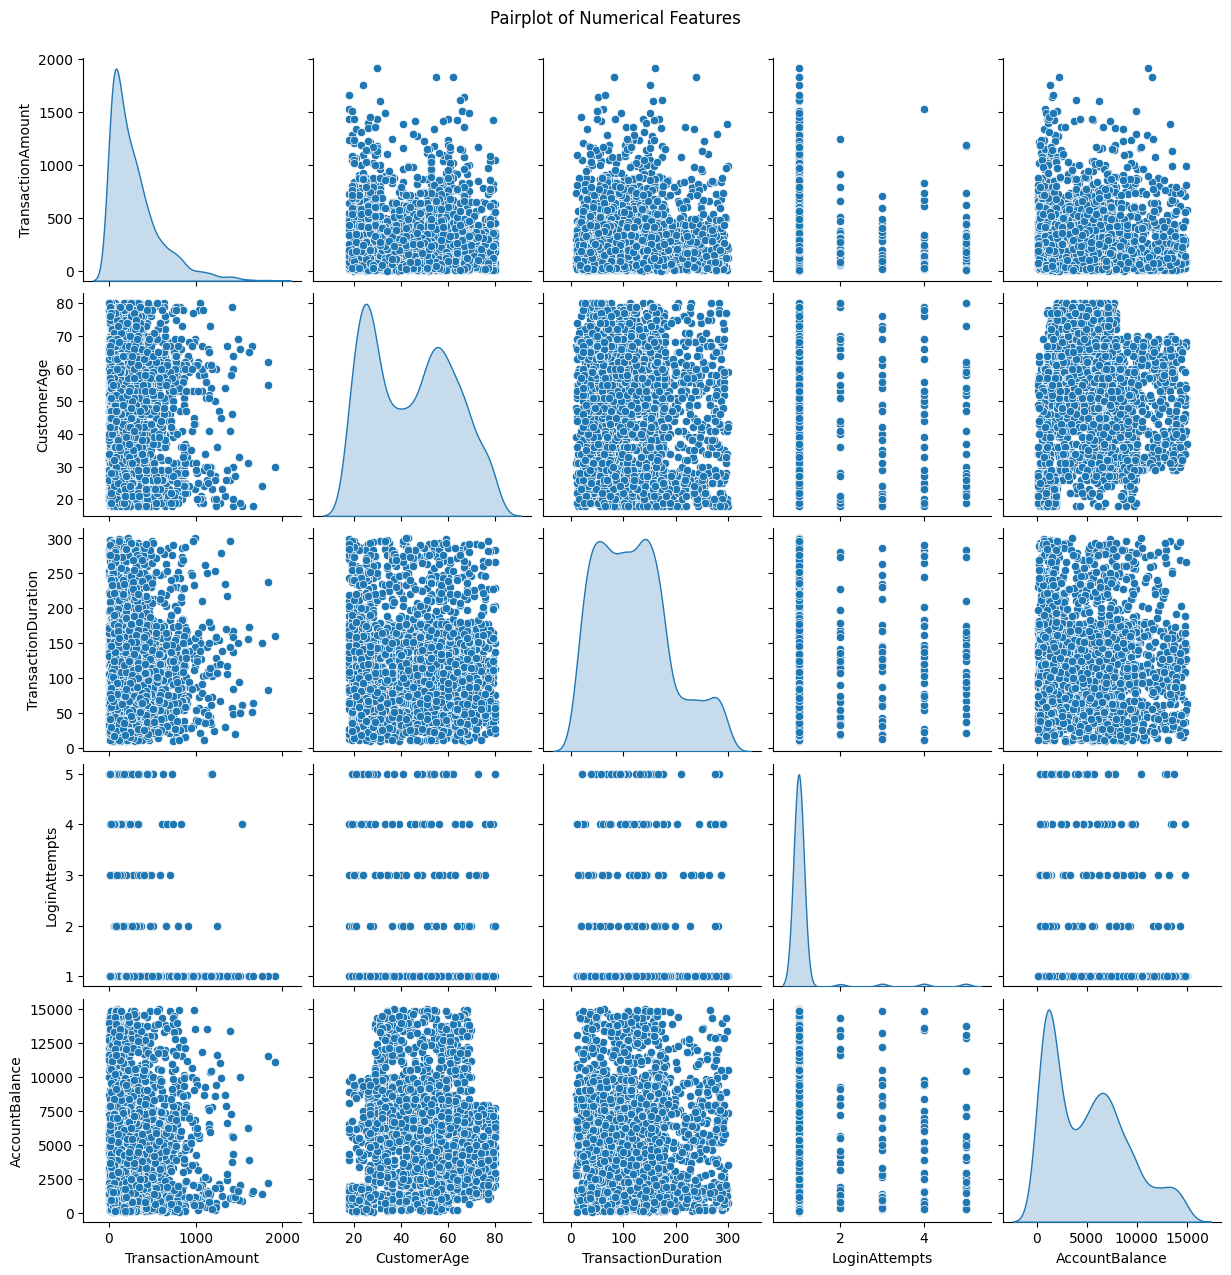

In [13]:
# Melihat hubungan antar setiap pasangan fitur numerik 

sns.pairplot(df[numeric_df.columns], diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [14]:
# Mengecek dataset menggunakan isnull().sum()

df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [15]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [16]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [17]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [18]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,0,1,2,NaN,3,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [19]:
# Last checking gunakan columns.tolist() 
# 
# untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [20]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()
df.isnull().sum().sum()

np.int64(0)

In [21]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [22]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_counts

'''
Outliers untuk Jumlah transaksi dan login attempts mungkin bisa berguna 

'''

'\nOutliers untuk Jumlah transaksi dan login attempts mungkin bisa berguna \n\n'

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Binning CustomerAge


# umur di bining maka di reverse ke nilai sebelum dilakukan standarisasi 
df['CustomerAge_original'] = scaler.inverse_transform(df[numeric_cols])[:, numeric_cols.get_loc('CustomerAge')]
 
max_age = max(56, df['CustomerAge_original'].max())
bins_age = [0, 30, 55, max_age]
labels_age = ['Muda', 'Dewasa', 'Lansia']
df['AgeGroup'] = pd.cut(df['CustomerAge_original'], bins=bins_age, labels=labels_age, include_lowest=True)

q1 = df['TransactionAmount'].quantile(0.25)
q3 = df['TransactionAmount'].quantile(0.75)
bins_amount = [df['TransactionAmount'].min(), q1, q3, df['TransactionAmount'].max()]
labels_amount = ['Kecil', 'Sedang', 'Besar']
df['AmountGroup'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount, include_lowest=True)

le_age = LabelEncoder()
df['AgeGroup_encoded'] = le_age.fit_transform(df['AgeGroup'])

le_amount = LabelEncoder()
df['AmountGroup_encoded'] = le_amount.fit_transform(df['AmountGroup'])

df.head(10)

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_original,AgeGroup,AmountGroup,AgeGroup_encoded,AmountGroup_encoded
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,70.0,Lansia,Kecil,1,1
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,68.0,Lansia,Sedang,1,2
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,19.0,Muda,Sedang,2,2
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,26.0,Muda,Sedang,2,2
5,-0.703375,2023-04-03 17:15:01,1,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,18.0,Muda,Sedang,2,2
6,-0.994538,2023-02-15 16:36:48,0,39,0,-0.430555,0,0.279415,-0.204629,2.104915,2024-11-04 08:10:09,37.0,Dewasa,Kecil,0,1
7,-0.432062,2023-05-08 17:47:59,0,16,1,1.251642,2,2.448842,-0.204629,-0.594580,2024-11-04 08:10:55,67.0,Lansia,Sedang,1,2
8,-0.655184,2023-03-21 16:59:46,0,11,1,0.354470,1,-0.477031,-0.204629,1.021683,2024-11-04 08:11:14,51.0,Dewasa,Sedang,0,2
9,1.773966,2023-03-31 16:06:57,1,26,0,0.578763,0,0.008236,-0.204629,-1.049871,2024-11-04 08:06:32,55.0,Dewasa,Besar,0,0
10,-0.957916,2023-03-14 16:46:10,0,0,2,0.410543,1,-0.862390,-0.204629,0.637915,2024-11-04 08:06:45,52.0,Dewasa,Kecil,0,1


In [24]:
df = df.drop(columns=['CustomerAge_original', 'AgeGroup', 'AmountGroup']) # karena sudah di encode

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [25]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup_encoded,AmountGroup_encoded
count,2348.000000,2348,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348,2348.000000,2348.000000
mean,-0.003562,2023-07-05 11:37:52.443781888,0.788756,21.424617,1.011073,0.000621,1.528535,0.003191,-0.001123,-0.001625,2024-11-04 08:09:22.644804096,0.957411,1.250000
min,-1.017881,2023-01-02 16:00:06,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100,2024-11-04 08:06:23,0.000000,0.000000
25%,-0.740408,2023-04-02 22:45:41,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.805299,-0.204629,-0.928979,2024-11-04 08:07:54,0.000000,0.750000
50%,-0.296115,2023-07-06 18:13:32,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-0.204629,-0.104527,2024-11-04 08:09:23,1.000000,1.500000
75%,0.388259,2023-10-06 16:20:27.249999872,1.000000,32.000000,2.000000,0.803056,3.000000,0.607683,-0.204629,0.662810,2024-11-04 08:10:53,2.000000,2.000000
max,5.549651,2024-01-01 18:21:50,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,6.525404,2.531190,2024-11-04 08:12:23,2.000000,2.000000
std,0.999940,NaN,0.437496,12.432136,0.829195,1.000238,1.154655,1.006276,0.990648,1.002409,NaN,0.820939,0.829333


In [26]:
import yellowbrick

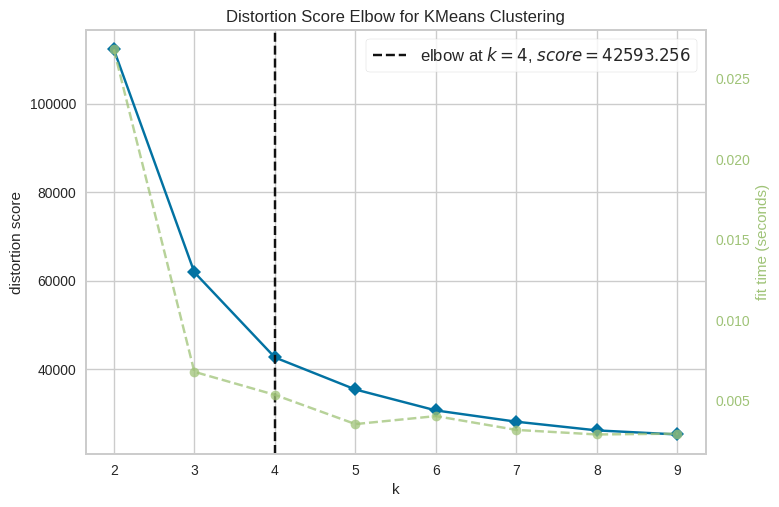

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from yellowbrick.cluster import KElbowVisualizer

X_num = df.select_dtypes(include=['int64', 'float64'])

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_num)
visualizer.show()

In [28]:
# Menggunakan algoritma K-Means Clustering
# Gunakan jumlah cluster terbaik dari hasil Elbow Method, misal n_clusters=3
n_clusters = 4  # sesuai hasil Elbow
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Target'] = model_kmeans.fit_predict(X_num)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup_encoded,AmountGroup_encoded,Target
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,1,1,1
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,2,3
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,2,2,0
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,2,2,1
5,-0.703375,2023-04-03 17:15:01,1,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,2,2,0


In [29]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

k = 2, silhouette score = 0.5633
k = 3, silhouette score = 0.4822
k = 4, silhouette score = 0.4278
k = 5, silhouette score = 0.3743
k = 6, silhouette score = 0.3240
k = 7, silhouette score = 0.2786
k = 8, silhouette score = 0.2536
k = 9, silhouette score = 0.2254
k = 10, silhouette score = 0.2200


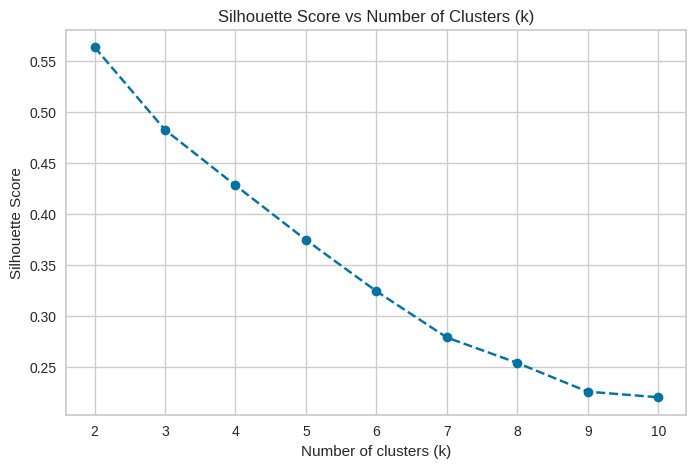


✅ Best k based on silhouette score: 2


In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_scores = []

# iterasi k untuk melihat score setiap jumlah cluster
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_num)
    score = silhouette_score(X_num, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, silhouette score = {score:.4f}")

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Best k based on silhouette score: {best_k}")


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

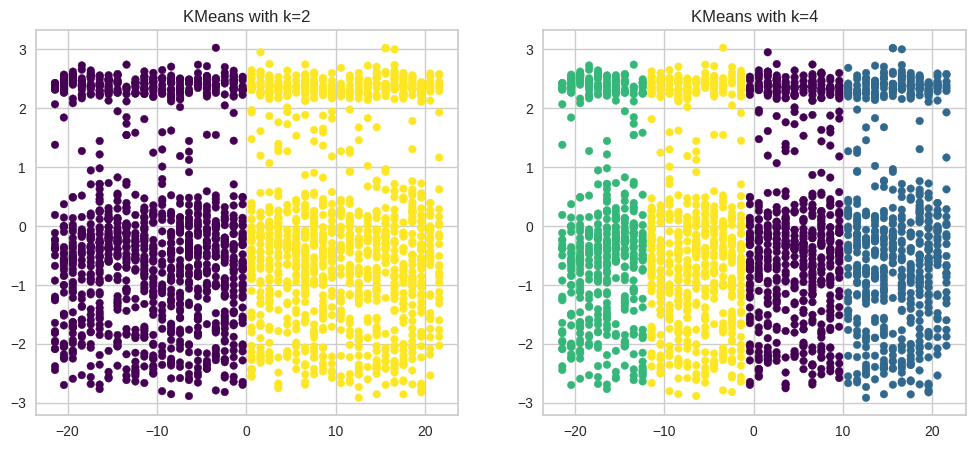

In [ ]:
# Membuat visualisasi hasil clustering dengan PCA saat k = 2 (berdasarkan silhouette score )dan k = 4 ( berdasarkan elbow)

from sklearn.cluster import KMeans

# reduksi dimensi data ke 2d
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_num)
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans4 = KMeans(n_clusters=4, random_state=42)

labels2 = kmeans2.fit_predict(X_num)
labels4 = kmeans4.fit_predict(X_num)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K=2
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap="viridis", s=30)
axes[0].set_title("KMeans with k=2")

# K=4
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels4, cmap="viridis", s=30)
axes[1].set_title("KMeans with k=4")

plt.show()


In [32]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_num)
PCA_2 = pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(2)])

# Bangun model KMeans (dengan k = 4)  dengan data PCA
model_kmeans_pca = KMeans(n_clusters=4, random_state=42)
PCA_2['Target'] = model_kmeans_pca.fit_predict(PCA_2)
PCA_2.head(10)


,PCA1,PCA2,Target
0,14.571689,-1.585918,1
1,-6.428537,-2.613250,3
2,1.581325,2.403001,0
3,11.580838,1.295680,1
4,6.576189,2.450458,0
5,17.575667,-2.352600,1
6,-5.432069,0.087912,3
7,-10.423340,-1.429224,3
8,4.575130,-0.938363,0
9,-21.422399,-1.233451,2


In [33]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

import joblib
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.


pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_num)

data_final = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_final)

df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

# 3. Analisis deskriptif: 
cluster_summary = df_with_clusters.groupby('Cluster').agg(['mean', 'min', 'max'])

cluster_summary.T


Cluster                                                   0  \
TransactionAmount       mean                      -0.025763   
                        min                       -1.017881   
                        max                        5.012878   
TransactionDate         mean  2023-07-07 18:15:12.529411840   
                        min             2023-01-02 16:00:06   
                        max             2024-01-01 18:21:50   
TransactionType         mean                       0.787582   
                        min                               0   
                        max                               2   
Location                mean                      26.037582   
                        min                              21   
                        max                              31   
Channel                 mean                       0.980392   
                        min                               0   
                        max                               3   
CustomerAge             mean                       0.039287   
                        min                       -1.495947   
                        max                        1.980594   
CustomerOccupation      mean                       1.616013   
                        min                               0   
                        max                               4   
TransactionDuration     mean                      -0.017744   
                        min                       -1.561745   
                        max                        2.577295   
LoginAttempts           mean                        0.00431   
                        min                       -0.204629   
                        max                        6.525404   
AccountBalance          mean                      -0.018752   
                        min                       -1.283147   
                        max                        2.486725   
PreviousTransactionDate mean  2024-11-04 08:09:25.258169856   
                        min             2024-11-04 08:06:23   
                        max             2024-11-04 08:12:23   
AgeGroup_encoded        mean                        0.94281   
                        min                               0   
                        max                               2   
AmountGroup_encoded     mean                       1.284314   
                        min                               0   
                        max                               2   
Target                  mean                            0.0   
                        min                               0   
                        max                               0   

Cluster                                                   1  \
TransactionAmount       mean                       0.014655   
                        min                       -1.013945   
                        max                        5.549651   
TransactionDate         mean  2023-07-05 13:48:56.436065536   
                        min             2023-01-02 16:06:29   
                        max             2024-01-01 17:37:04   
TransactionType         mean                       0.768852   
                        min                               0   
                        max                               2   
Location                mean                      37.421311   
                        min                              32   
                        max                              43   
Channel                 mean                       1.044262   
                        min                               0   
                        max                               3   
CustomerAge             mean                      -0.074536   
                        min                       -1.495947   
                        max                        1.980594   
CustomerOccupation      mean                       1.490164   
                        min   

In [35]:
cluster_summary.T.to_csv('cluster_summary.csv')


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: ()**:
  - **Rata-rata (mean) Location:** 26.038 <Setelah inverse>
  - **Mean CustomerOccupation:** 1.616
  - **Mean CustomerAge:** 0.039287
  - **Analisis:** Cluster ini memiliki lokasi yang cukup tinggi, namun dari data ini tidak bisa dilakukan inferensi karena fitur lokasi merupakan fitur kategorikal sehingga tidak ada hubungan besar angka encode dengan lokasi. Begitu juga dengan Customer Occupation (nilai pekerjaan diskrit). Posisi rata-rata umur berada di daerah dewasa ke lansia dengan condong dewasa

2. **Cluster 1: ()**:
  - **Rata-rata (mean) Location:** 37.421
  - **CustomerAge (mean):** -0.075

  - **Analisis:** Cluster ini memiliki lokasi yang juga cukup tinggi, namun tidak bisa diinferensi sama seperti cluster 0. Cluster ini mencakup transaksi bank yang dilakukan oleh orang di daerah muda ke dewasa

3. **Cluster 2: ()**:
  - **Rata-rata (mean) CustomerOccupation :** 1.590 (tidak bisa melakukan inferensi)
  - **Analisis** : Untuk kelas yang lain juga terlihat merata dan sulit untuk menarik kesimpulan karena masih dalam nilai yang standarisasi (tidak intuitif)

4. **Cluster 3: ()**:
  - **Location (mean)** : 15.066
  - **Customer Occupation (mean)** : 1.427
  - **Analisis** :Fitur lainnya hampir sama dengan cluster lainnya masih sulit untuk menarik kesimpulan

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [36]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup_encoded,AmountGroup_encoded,Target
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,1,1,1
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,2,3
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,2,2,0
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,2,2,1
5,-0.703375,2023-04-03 17:15:01,1,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,2024-11-04 08:06:36,2,2,0


In [37]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)  

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [40]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

numerical_cols = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup_encoded,AmountGroup_encoded,Target
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,1,1,1
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2,3
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,2,2,0
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,2,2,1
5,92.15,2023-04-03 17:15:01,1,28,0,18.0,3,172.0,1.0,781.68,2024-11-04 08:06:36,2,2,0


In [41]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

categorical_cols = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

for col in categorical_cols:
    le = label_encoders[col]   
    df[col] = le.inverse_transform(df[col].astype(int))

df.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup_encoded,AmountGroup_encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1,1,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2,2,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2,2,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,2,2,0


In [43]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

numeric_summary = df.groupby("Target")[numerical_cols].agg(["mean", "min", "max"])

# Analisis kategorikal (mode per cluster)
categorical_summary = df.groupby("Target")[categorical_cols].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)


final_summary = numeric_summary.copy()
for col in categorical_summary.columns:
    final_summary[col + "_mode"] = categorical_summary[col]

final_summary


TransactionAmount                CustomerAge              \
                    mean   min      max        mean   min   max   
Target                                                            
0             290.129167  0.26  1762.28   45.379085  18.0  80.0   
1             301.938262  1.41  1919.11   43.349180  18.0  80.0   
2             291.798820  0.32  1831.02   45.603482  18.0  80.0   
3             301.892085  0.45  1612.37   44.563218  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               118.179739  10.0  300.0      1.124183  1.0  5.0   
1               116.809836  10.0  296.0      1.086885  1.0  5.0   
2               120.307544  10.0  300.0      1.123791  1.0  5.0   
3               123.400657  10.0  299.0      1.149425  1.0  5.0   

       AccountBalance                   TransactionType_mode  Location_mode  \
                 mean     min       max                                       
Target                                                                        
0         5040.359771  112.76  14804.70                Debit  Oklahoma City   
1         5099.482557  101.25  14977.99                Debit         Tucson   
2         5118.697195  129.29  14935.50                Debit      Charlotte   
3         5171.978883  117.98  14942.78                Debit     Fort Worth   

       Channel_mode CustomerOccupation_mode  
                                             
Target                                       
0            Branch                 Student  
1            Branch                  Doctor  
2            Branch                 Student  
3            Branch                  Doctor

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Debit-Heavy Students, Moderate Balances)**:
  - **Mean Transaction Amount:** $290
  - **Mean Customer Age:** 45 tahun
  - **Mean Account Balance:** $5.040 
  - **Jenis Transaction Type terbanyak:** Debit
  - **Jenis Channel Terbanyak:** Branch
  - **Jenis Pekerjaan terbanyak:** Student    
  - **Analisis:** Cluster ini merupakan kelompok pengguna bank dengan mayoritas melakukan transaksi menggunakan debit melalui kantor cabang. Kelompok ini juga memiliki jumlah uang di bank yang cukup dan dengan rata-rata umur dewasa. Walaupun kelas mayoritas adalah Student tapi ada 3 jenis lain yaitu retires, engineer, dan doctor yang memang merupakan jenis pekerjaan orang 'dewasa'. 

2. **Cluster 1: (Debit-Heavy Doctor, higher Balances)**:
  - **Mean Transaction Amount:** $302
  - **Mean Customer Age:** 43 tahun
  - **Mean Account Balance:** $5.099 
  - **Jenis Transaction Type terbanyak:** Debit
  - **Jenis Channel Terbanyak:** Branch
  - **Jenis Pekerjaan terbanyak:** Doctor    
  - **Analisis:** Cluster ini merupakan kelompok pengguna bank dengan mayoritas melakukan transaksi menggunakan debit melalui kantor cabang. Kelompok ini juga memiliki jumlah uang di bank yang cukup banyak (lebih banyak dari cluster 0)dan dengan rata-rata umur dewasa. Lokasi mayoritas kelas ini adalah Tucson dan bekerja sebagai Doctor.

3. **Cluster 2: (Debit-Heavy Students, Slightly higher Balances)**:
  - **Mean Transaction Amount:** $292
  - **Mean Customer Age:** 46 tahun
  - **Mean Account Balance:** $5.119 
  - **Jenis Transaction Type terbanyak:** Debit
  - **Jenis Channel Terbanyak:** Branch
  - **Jenis Pekerjaan terbanyak:** Doctor    
  - **Analisis:** Cluster ini merupakan kelompok pengguna bank dengan mayoritas melakukan transaksi menggunakan debit melalui kantor cabang sama seperti 2 cluster sebelumnya. Kelompok ini juga memiliki jumlah uang di bank yang ebih banyak dari cluster 0 dan 1 namun memiliki rata-rata jumlah transaksi lebih sedikit. Mayoritas kelas ini meruoakan Student dengan uang yang lebih banyak dari cluster 0 dan mayoritas transaksi terjadi di Charlotte.

4. **Cluster 3: (Debit-Heavy Doctor,  Highest Balances)**:
  - **Mean Transaction Amount:** $302
  - **Mean Customer Age:** 45 tahun
  - **Mean Account Balance:** $5.172 
  - **Jenis Transaction Type terbanyak:** Debit
  - **Jenis Channel Terbanyak:** Branch
  - **Jenis Pekerjaan terbanyak:** Doctor    
  - **Analisis:** Cluster ini merupakan kelompok pengguna bank dengan mayoritas melakukan transaksi menggunakan debit melalui kantor cabang. Kelompok ini juga memiliki jumlah uang di bank yang paling banyak di antara cluster lainnya. Cluster ini mirip dengan cluster 1 dengan perbedaan lokasi dan balance yang lebih. 

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [45]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_final = df.copy()
df_final.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup_encoded,AmountGroup_encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1,1,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2,2,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2,2,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,2,2,0


In [46]:
# Simpan Data
df_final.to_csv('data_clustering_inverse.csv', index=False)  # Simpan data inverse

End of Code.